# 日経平均株価 週足 移動平均

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-13 00:00:00+09:00,27705.369141,27727.660156,27444.130859,27513.130859,264800000,0.0,0.0
2023-02-20 00:00:00+09:00,27497.130859,27538.289062,27046.080078,27453.480469,274800000,0.0,0.0
2023-02-27 00:00:00+09:00,27322.730469,27961.210938,27292.740234,27927.470703,363000000,0.0,0.0
2023-03-06 00:00:00+09:00,28182.310547,28734.789062,28118.740234,28143.970703,386300000,0.0,0.0
2023-03-13 00:00:00+09:00,27886.210938,27906.970703,26632.919922,27333.789062,517000000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-13 00:00:00+09:00,39010.960938,39054.351562,38055.679688,38451.460938,457100000,0.0,0.0
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,38886.050781,39572.488281,589000000,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-10 00:00:00+09:00,23714.519531,23738.419922,23603.480469,23687.589844,69100000,0.0,0.0
2020-02-17 00:00:00+09:00,23489.779297,23806.560547,23133.599609,23386.740234,300500000,0.0,0.0
2020-02-24 00:00:00+09:00,22949.369141,22950.230469,20916.400391,21142.960938,459800000,0.0,0.0
2020-03-02 00:00:00+09:00,20849.789062,21719.779297,20613.910156,20749.750000,521000000,0.0,0.0
2020-03-09 00:00:00+09:00,20343.310547,20347.189453,16690.599609,17431.050781,862200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-13 00:00:00+09:00,39010.960938,39054.351562,38055.679688,38451.460938,457100000,0.0,0.0
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0
2025-01-27 00:00:00+09:00,40127.738281,40255.679688,38886.050781,39572.488281,589000000,0.0,0.0


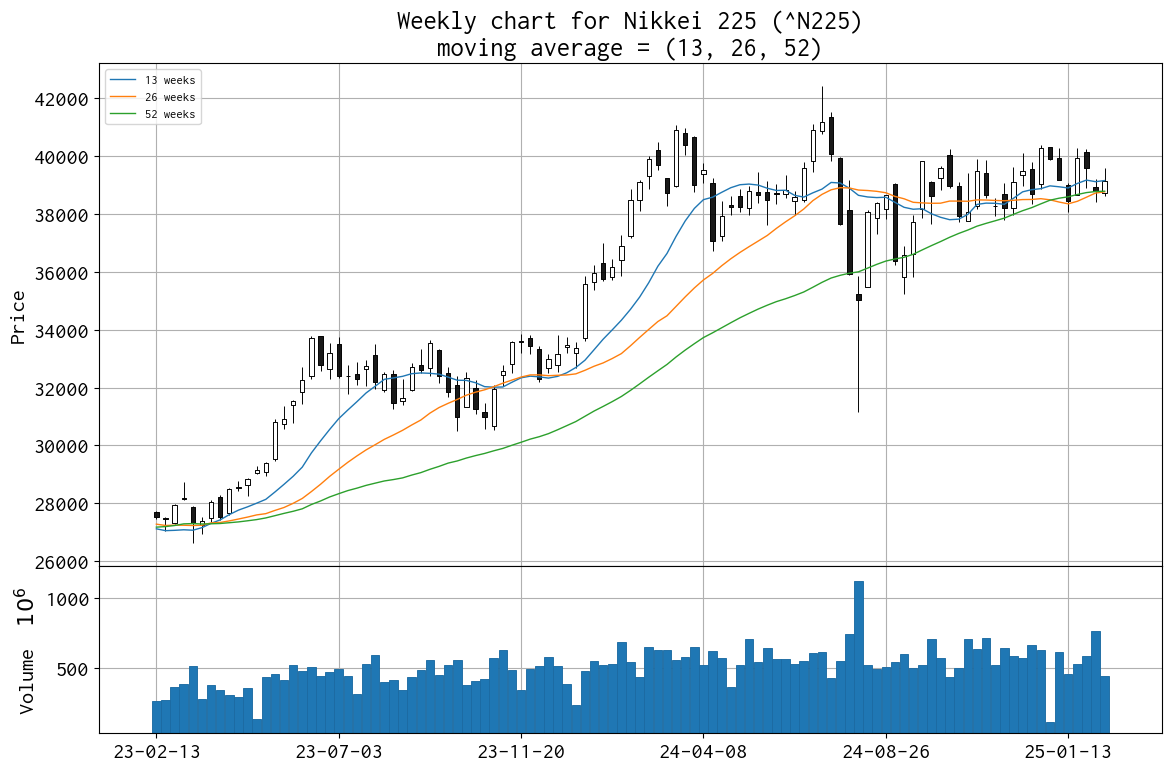

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

ma13 = df0['Close'].rolling(13).mean()
ma26 = df0['Close'].rolling(26).mean()
ma52 = df0['Close'].rolling(52).mean()

apds  = [
    mpf.make_addplot(ma13[df.index], width=1, label='13 weeks', ax=ax[0]),
    mpf.make_addplot(ma26[df.index], width=1, label='26 weeks', ax=ax[0]),
    mpf.make_addplot(ma52[df.index], width=1, label='52 weeks', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving average = (13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_n225.png')
plt.show()

In [4]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-03 00:00:00+09:00,38932.660156,39192.511719,38401.820312,38787.019531,768100000,0.0,0.0
2025-02-10 00:00:00+09:00,38736.371094,39581.468750,38606.320312,39149.429688,440500000,0.0,0.0


In [5]:
df.tail(2)['Close']

Date
2025-02-03 00:00:00+09:00    38787.019531
2025-02-10 00:00:00+09:00    39149.429688
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-02-03 00:00:00+09:00           NaN
2025-02-10 00:00:00+09:00    362.410156
Name: Close, dtype: float64

In [7]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-02-10 00:00:00+09:00    413.058594
dtype: float64

In [8]:
df['Close'].rolling(13).mean()

Date
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
2023-02-27 00:00:00+09:00             NaN
2023-03-06 00:00:00+09:00             NaN
2023-03-13 00:00:00+09:00             NaN
                                 ...     
2025-01-13 00:00:00+09:00    38898.756010
2025-01-20 00:00:00+09:00    39053.991286
2025-01-27 00:00:00+09:00    39170.823317
2025-02-03 00:00:00+09:00    39115.950120
2025-02-10 00:00:00+09:00    39154.913161
Name: Close, Length: 105, dtype: float64

In [9]:
df['Close'].rolling(26).mean()

Date
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
2023-02-27 00:00:00+09:00             NaN
2023-03-06 00:00:00+09:00             NaN
2023-03-13 00:00:00+09:00             NaN
                                 ...     
2025-01-13 00:00:00+09:00    38350.403846
2025-01-20 00:00:00+09:00    38437.502704
2025-01-27 00:00:00+09:00    38578.379207
2025-02-03 00:00:00+09:00    38723.072266
2025-02-10 00:00:00+09:00    38764.870643
Name: Close, Length: 105, dtype: float64

In [10]:
df['Close'].rolling(52).mean()

Date
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
2023-02-27 00:00:00+09:00             NaN
2023-03-06 00:00:00+09:00             NaN
2023-03-13 00:00:00+09:00             NaN
                                 ...     
2025-01-13 00:00:00+09:00    38592.661283
2025-01-20 00:00:00+09:00    38673.063401
2025-01-27 00:00:00+09:00    38738.726262
2025-02-03 00:00:00+09:00    38775.064678
2025-02-10 00:00:00+09:00    38787.799129
Name: Close, Length: 105, dtype: float64